In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [303]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/HINDALCO.csv")

In [304]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HINDALC0,EQ,813.45,851.00,878.50,851.0,869.0,867.45,869.86,33799,2.940055e+12,NaN,NaN,NaN
1,2000-01-04,HINDALC0,EQ,867.45,879.00,930.00,870.0,900.0,900.35,903.51,70944,6.409848e+12,NaN,NaN,NaN
2,2000-01-05,HINDALC0,EQ,900.35,835.00,972.40,835.0,972.4,972.35,949.32,153030,1.452744e+13,NaN,NaN,NaN
3,2000-01-06,HINDALC0,EQ,972.35,1050.15,1050.15,1015.1,1045.0,1048.45,1047.08,129708,1.358144e+13,NaN,NaN,NaN
4,2000-01-07,HINDALC0,EQ,1048.45,1096.00,1120.00,1015.0,1086.0,1094.95,1085.24,138829,1.506623e+13,NaN,NaN,NaN


In [305]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4781 non-null   float64
 14  %Deliverble         4781 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [306]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.781000e+03,4781.000000
mean,355.738504,356.085064,362.501696,349.341934,355.680107,355.653873,355.879176,6.320499e+06,1.056218e+14,60639.510586,2.551709e+06,0.434026
std,356.014633,356.596610,362.459284,350.142561,355.938376,355.959176,356.197303,6.266133e+06,1.226098e+14,34429.932376,2.314570e+06,0.168495
min,37.400000,37.000000,38.400000,36.750000,37.500000,37.400000,37.740000,6.200000e+01,4.773755e+09,2598.000000,1.053000e+03,0.045400
25%,135.950000,136.000000,138.812500,133.562500,136.112500,135.950000,136.087500,2.467105e+05,1.927090e+13,38081.000000,9.599470e+05,0.314700
50%,184.025000,184.000000,187.900000,181.000000,184.000000,184.025000,184.390000,5.492389e+06,7.532902e+13,52399.000000,2.150299e+06,0.407100
75%,565.550000,561.000000,574.975000,554.600000,565.000000,564.675000,561.905000,9.319115e+06,1.462953e+14,73767.500000,3.586920e+06,0.523900
max,1472.600000,1599.000000,1599.000000,1450.000000,1475.000000,1472.600000,1461.420000,5.067723e+07,1.667374e+15,329561.000000,2.745422e+07,0.988300


In [307]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [308]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [309]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [310]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [311]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [312]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [313]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,3.690304,-1.317280,348.35,16472269,NaN
5302,5.684090,4.612968,366.25,41263319,NaN
5303,3.044693,-1.694456,362.60,15197329,NaN
5304,3.483269,1.292869,372.15,34391622,NaN
5305,4.345419,-1.219843,364.40,19935239,NaN


In [314]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [315]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [316]:
#Define the prediction model
model = RandomForestRegressor()

In [317]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [318]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9420024669599266


In [319]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [320]:
predictions = model.predict(X_Check)

In [321]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

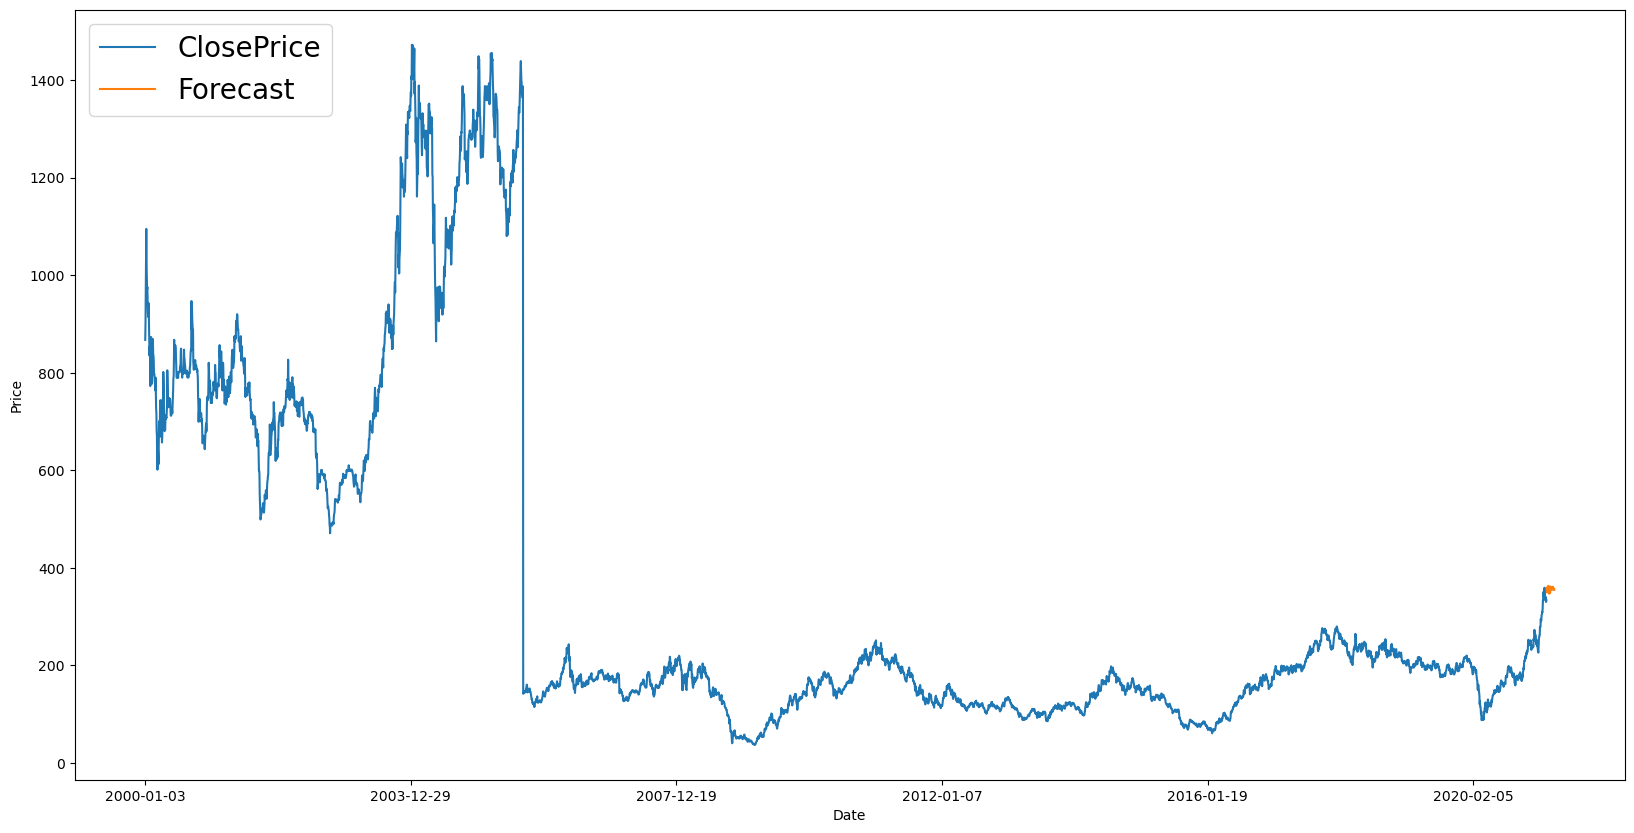

In [322]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')